<a href="https://colab.research.google.com/github/warisqr007/Time-Series-Forecasting/blob/main/Assigmnet_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Research/Data/data_csvs'

/content/drive/My Drive/Research/Data/data_csvs


In [3]:
ls

100.csv  112.csv  21.csv  33.csv  45.csv  57.csv  69.csv  80.csv  92.csv
101.csv  113.csv  22.csv  34.csv  46.csv  58.csv  6.csv   81.csv  93.csv
102.csv  11.csv   23.csv  35.csv  47.csv  59.csv  70.csv  82.csv  94.csv
103.csv  12.csv   24.csv  36.csv  48.csv  5.csv   71.csv  83.csv  95.csv
104.csv  13.csv   25.csv  37.csv  49.csv  60.csv  72.csv  84.csv  96.csv
105.csv  14.csv   26.csv  38.csv  4.csv   61.csv  73.csv  85.csv  97.csv
106.csv  15.csv   27.csv  39.csv  50.csv  62.csv  74.csv  86.csv  98.csv
107.csv  16.csv   28.csv  3.csv   51.csv  63.csv  75.csv  87.csv  99.csv
108.csv  17.csv   29.csv  40.csv  52.csv  64.csv  76.csv  88.csv  9.csv
109.csv  18.csv   2.csv   41.csv  53.csv  65.csv  77.csv  89.csv
10.csv   19.csv   30.csv  42.csv  54.csv  66.csv  78.csv  8.csv
110.csv  1.csv    31.csv  43.csv  55.csv  67.csv  79.csv  90.csv
111.csv  20.csv   32.csv  44.csv  56.csv  68.csv  7.csv   91.csv


In [4]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

path, dirs, files = next(os.walk("./"))
file_count = len(files)
dataframes_list = []
  
for i in range(file_count):
    temp_df = pd.read_csv("./"+files[i], na_values = ['High', 'Low'])
    dataframes_list.append(temp_df)
      

In [5]:
len(dataframes_list)

113

# **Data-Preprocessing**

The time series sensor data were preprocessed and converted to as to be used for supervised learning. Each training/test example were represented by 48 datapoints corresponding to 4 hours of sensor data, and output label represented by 7 datapoints, where t54 represents the label to be predicted.

The rows containing null/empty value or values like 'High','Low' were dropped from training and test set.

The training set was formed by randoming selecting 80% of the sensors and forming the dataset from them. Rest of the sensors data formed the test set.

In [7]:
a = np.arange(113)

selectedTrainSet = np.random.choice(a, size=90, replace=False)

selectedTrainSet

array([  1,  66,  24, 107,  64,  99,  90,  29,  17, 105, 103,  47, 112,
        50,  43,  80,  20,  37,   8,  72,  82,  12,  40,  26,  97,  76,
        53,  57, 109,  54,  85,  13,  30,  60,  33,   0, 104,  96,  49,
        41,  32,   7,  91,  15,  22, 108, 110,  59, 102,  78,  95,  42,
        73,  14,  89,  83,  94,  77,  35,  23,  52,  16,  87,   9,  75,
        81,  56,  61,  25,  39,  70,  21,  45,   3,  31,   2,  34,  74,
        92,  19,  69,  28,  11,   5,  63,  65,  84,  48,  18,  58])

In [8]:
trainSetDataFrames = []
testSetDataFrames = []

for i in range(113):
  df=dataframes_list[i]
  timeSeriesToSupervised = pd.DataFrame()
  timeSeriesToSupervised['t'] = df.iloc[:,0].tolist()
  for j in range(54):
    timeSeriesToSupervised['t'+str(j+1)] = timeSeriesToSupervised['t'].shift(-(j+1));
  
  timeSeriesToSupervised.dropna(inplace=True)

  if i in selectedTrainSet:
    trainSetDataFrames.append(timeSeriesToSupervised)
  else:
    testSetDataFrames.append(timeSeriesToSupervised)

In [9]:
initialTestSet = pd.concat(testSetDataFrames)
initialTrainingSet = pd.concat(trainSetDataFrames)

Transformed Sensor Data to be used by models

In [78]:
initialTrainingSet.head(5)

,t,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54
0,290.0,291.0,290.0,290.0,289.0,286.0,283.0,278.0,272.0,266.0,260.0,255.0,249.0,240.0,230.0,222.0,216.0,210.0,204.0,197.0,194.0,194.0,196.0,196.0,196.0,194.0,191.0,188.0,185.0,182.0,178.0,172.0,165.0,159.0,157.0,157.0,158.0,159.0,159.0,156.0,152.0,148.0,144.0,141.0,139.0,135.0,131.0,126.0,123.0,121.0,121.0,121.0,121.0,118.0,115.0
1,291.0,290.0,290.0,289.0,286.0,283.0,278.0,272.0,266.0,260.0,255.0,249.0,240.0,230.0,222.0,216.0,210.0,204.0,197.0,194.0,194.0,196.0,196.0,196.0,194.0,191.0,188.0,185.0,182.0,178.0,172.0,165.0,159.0,157.0,157.0,158.0,159.0,159.0,156.0,152.0,148.0,144.0,141.0,139.0,135.0,131.0,126.0,123.0,121.0,121.0,121.0,121.0,118.0,115.0,114.0
2,290.0,290.0,289.0,286.0,283.0,278.0,272.0,266.0,260.0,255.0,249.0,240.0,230.0,222.0,216.0,210.0,204.0,197.0,194.0,194.0,196.0,196.0,196.0,194.0,191.0,188.0,185.0,182.0,178.0,172.0,165.0,159.0,157.0,157.0,158.0,159.0,159.0,156.0,152.0,148.0,144.0,141.0,139.0,135.0,131.0,126.0,123.0,121.0,121.0,121.0,121.0,118.0,115.0,114.0,117.0
3,290.0,289.0,286.0,283.0,278.0,272.0,266.0,260.0,255.0,249.0,240.0,230.0,222.0,216.0,210.0,204.0,197.0,194.0,194.0,196.0,196.0,196.0,194.0,191.0,188.0,185.0,182.0,178.0,172.0,165.0,159.0,157.0,157.0,158.0,159.0,159.0,156.0,152.0,148.0,144.0,141.0,139.0,135.0,131.0,126.0,123.0,121.0,121.0,121.0,121.0,118.0,115.0,114.0,117.0,124.0
4,289.0,286.0,283.0,278.0,272.0,266.0,260.0,255.0,249.0,240.0,230.0,222.0,216.0,210.0,204.0,197.0,194.0,194.0,196.0,196.0,196.0,194.0,191.0,188.0,185.0,182.0,178.0,172.0,165.0,159.0,157.0,157.0,158.0,159.0,159.0,156.0,152.0,148.0,144.0,141.0,139.0,135.0,131.0,126.0,123.0,121.0,121.0,121.0,121.0,118.0,115.0,114.0,117.0,124.0,132.0


In [ ]:
initialTrainingSet.describe()

,t,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54
count,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06,1.451252e+06
mean,1.676370e+02,1.675406e+02,1.674495e+02,1.673576e+02,1.672705e+02,1.671876e+02,1.671095e+02,1.670362e+02,1.669674e+02,1.669029e+02,1.668421e+02,1.667852e+02,1.667317e+02,1.666817e+02,1.666356e+02,1.665933e+02,1.665548e+02,1.665196e+02,1.664875e+02,1.664587e+02,1.664332e+02,1.664110e+02,1.663917e+02,1.663749e+02,1.663608e+02,1.663493e+02,1.663407e+02,1.663350e+02,1.663314e+02,1.663303e+02,1.663316e+02,1.663352e+02,1.663410e+02,1.663496e+02,1.663609e+02,1.663752e+02,1.663933e+02,1.664151e+02,1.664409e+02,1.664710e+02,1.665049e+02,1.665428e+02,1.665847e+02,1.666305e+02,1.666804e+02,1.667343e+02,1.667921e+02,1.668539e+02,1.669199e+02,1.669904e+02,1.670648e+02,1.671427e+02,1.672243e+02,1.673102e+02,1.674011e+02
std,7.003670e+01,6.980746e+01,6.960942e+01,6.943903e+01,6.928953e+01,6.915668e+01,6.903819e+01,6.893163e+01,6.883525e+01,6.874794e+01,6.866842e+01,6.859643e+01,6.853096e+01,6.847171e+01,6.841836e+01,6.837047e+01,6.832780e+01,6.828921e+01,6.825445e+01,6.822318e+01,6.819498e+01,6.817035e+01,6.814883e+01,6.813020e+01,6.811408e+01,6.810060e+01,6.808972e+01,6.808120e+01,6.807510e+01,6.807133e+01,6.806997e+01,6.807073e+01,6.807386e+01,6.807933e+01,6.808753e+01,6.809904e+01,6.811480e+01,6.813573e+01,6.816216e+01,6.819452e+01,6.823330e+01,6.827843e+01,6.833063e+01,6.838995e+01,6.845787e+01,6.853437e+01,6.862023e+01,6.871651e+01,6.882410e+01,6.894464e+01,6.907927e+01,6.922937e+01,6.939879e+01,6.959128e+01,6.981180e+01
min,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.400000e+01,3.400000e+01
25%,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
50%,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.5300

In [ ]:
initialTestSet.describe()

,t,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54
count,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.00000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000,351524.000000
mean,161.789309,161.681538,161.578199,161.475285,161.377656,161.283537,161.193503,161.107722,161.026576,160.949776,160.877519,160.811558,160.751374,160.696180,160.645868,160.599834,160.558084,160.520394,160.486379,160.455235,160.425578,160.399600,160.376606,160.356431,160.339712,160.325750,160.315717,160.309103,160.307006,160.308807,160.312963,160.320450,160.330746,160.343464,160.358508,160.375755,160.39589,160.419641,160.446539,160.477253,160.511251,160.548549,160.588546,160.631496,160.677806,160.728946,160.785685,160.846400,160.911770,160.982249,161.057646,161.141379,161.231028,161.327622,161.431083
std,69.821229,69.584393,69.377814,69.199614,69.042309,68.901431,68.774803,68.661119,68.559005,68.466896,68.384205,68.313059,68.251974,68.198337,68.151855,68.111498,68.076452,68.046410,68.021381,67.999825,67.979853,67.963315,67.949839,67.939747,67.933133,67.930129,67.931013,67.935109,67.941975,67.952242,67.964032,67.979312,67.996334,68.016251,68.037384,68.060291,68.08701,68.117939,68.152681,68.192530,68.236590,68.285409,68.338852,68.398002,68.463438,68.537113,68.621170,68.714865,68.820048,68.940426,69.075958,69.230245,69.404528,69.604267,69.833135
min,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
25%,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
50%,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
75%,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

X_train = initialTrainingSet.drop(['t48', 't49', 't50', 't51', 't52', 't53', 't54'], axis=1)
y_train = initialTrainingSet[['t48', 't49', 't50', 't51', 't52', 't53', 't54']]

X_test = initialTestSet.drop(['t48', 't49', 't50', 't51', 't52', 't53', 't54'], axis=1)
y_test = initialTestSet[['t48', 't49', 't50', 't51', 't52', 't53', 't54']]

Labels to be used for single step prediction.

In [79]:
y_train_single_step = initialTrainingSet['t54']
y_test_single_step = initialTestSet['t54']

The train and test input were 

In [11]:
#scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
scaling = StandardScaler().fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [81]:
y_train_single_step = shuffle(y_train_single_step, random_state=0)

Ulitlity Functions to train models and visualise data.

In [13]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [14]:
MAX_EPOCHS = 40

def my_metric_fn(y_true, y_pred):
    squared_difference = tf.square(tf.gather(y_true, indices=[6], axis=1) - tf.gather(y_pred, indices=[6], axis=1))
    return tf.reduce_mean(squared_difference, axis=-1)


def compile_and_fit(model, X_train, y_train, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(), my_metric_fn])

  history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,
                      batch_size=256, verbose=1, validation_split=0.2,
                      callbacks=[early_stopping])
  return history

In [15]:
def plot(model=None, max_subplots=3):
  inputs = X_test
  inputs_to_display = scaling.inverse_transform(X_test)
  labels = y_test
  #print(y_test)
  plt.figure(figsize=(12, 8))
  max_n = min(max_subplots, len(inputs))
  total_window_size = 55
  label_width = 7
  input_slice = slice(0, 48)
  input_indices = np.arange(total_window_size)[input_slice]

  labels_slice = slice(48, None)
  label_indices = np.arange(total_window_size)[labels_slice]
  x=100
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel('Sensor Reading')
    #print(inputs_to_display[n, :])
    plt.plot(input_indices, inputs_to_display[n+x, :],
             label='Inputs', marker='.', zorder=-10)

    #print(n)
    #print(y_test.iloc[n, :])
    plt.scatter(label_indices, labels.iloc[n+x, :].tolist(),
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      #print(inputs[n+x, :])
      predictions = model(np.expand_dims(inputs[n+x, :], axis=0))
      plt.scatter(label_indices, predictions[0, :],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

    x=x+100

  plt.xlabel('Time [h]')

In [16]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [17]:
OUT_STEPS = 7
multi_performance = {}

# **Single Step Models**
The models in this case directly try to predict the '**t54**' datapoint (target variable 30 mins into future) based on the given 4 hours of sensor data.

## **1. Neural Network (with 2 Hidden Layer)**

Hidden Layer = (128, 64)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_shape = (48,)
print(f'Feature shape: {input_shape}')

model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
history = model.fit(X_train, y_train_single_step, epochs=40, batch_size=256, verbose=1, validation_split=0.2)

Feature shape: (48,)
Epoch 1/40
4610/4610 [==============================] - 20s 4ms/step - loss: 1642.3365 - mean_squared_error: 1642.3365 - val_loss: 878.6194 - val_mean_squared_error: 878.6194
Epoch 2/40
4610/4610 [==============================] - 19s 4ms/step - loss: 869.8815 - mean_squared_error: 869.8815 - val_loss: 859.8989 - val_mean_squared_error: 859.8989
Epoch 3/40
4610/4610 [==============================] - 19s 4ms/step - loss: 856.8510 - mean_squared_error: 856.8510 - val_loss: 839.8617 - val_mean_squared_error: 839.8617
Epoch 4/40
4610/4610 [==============================] - 19s 4ms/step - loss: 837.4255 - mean_squared_error: 837.4255 - val_loss: 830.7698 - val_mean_squared_error: 830.7698
Epoch 5/40
4610/4610 [==============================] - 18s 4ms/step - loss: 822.6815 - mean_squared_error: 822.6815 - val_loss: 811.4662 - val_mean_squared_error: 811.4662
Epoch 6/40
4610/4610 [==============================] - 19s 4ms/step - loss: 814.0458 - mean_squared_error: 814.

In [ ]:
score = model.evaluate(X_test, y_test_single_step, batch_size=256, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
visualize_loss(history, "Training and Validation Loss")

In [ ]:
inputs = X_test
inputs_to_display = scaling.inverse_transform(X_test)
labels = y_test
#print(y_test)
plt.figure(figsize=(12, 8))
max_n = min(3, len(inputs))
total_window_size = 55
label_width = 7
input_slice = slice(0, 48)
input_indices = np.arange(total_window_size)[input_slice]

labels_slice = slice(48, None)
label_indices = np.arange(total_window_size)[labels_slice]

labels_slice_pred = slice(54, None)
label_indices_pred = np.arange(total_window_size)[labels_slice_pred]
x=100
for n in range(max_n):
  plt.subplot(max_n, 1, n+1)
  plt.ylabel('Sensor Reading')
  #print(inputs_to_display[n, :])
  plt.plot(input_indices, inputs_to_display[n+x, :],
            label='Inputs', marker='.', zorder=-10)

  #print(n)
  #print(y_test.iloc[n, :])
  plt.scatter(label_indices, labels.iloc[n+x, :].tolist(),
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
  if model is not None:
    #print(inputs[n+x, :])
    predictions = model(np.expand_dims(inputs[n+x, :], axis=0))
    plt.scatter(label_indices_pred, predictions[0],
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)

  if n == 0:
    plt.legend()

  x=x+100

plt.xlabel('Time [h]')

In [55]:

multi_linear_model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
])

history = compile_and_fit(multi_linear_model, X_train, y_train)


In [56]:
multi_performance['Linear'] = multi_linear_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

1281/1281 [==============================] - 4s 3ms/step - loss: 497.0532 - mean_absolute_error: 14.1865 - my_metric_fn: 1056.1920


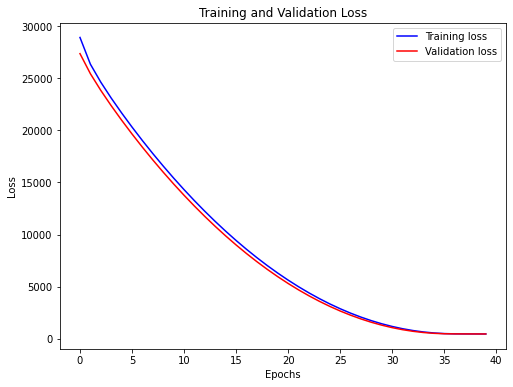

In [57]:
visualize_loss(history, "Training and Validation Loss")

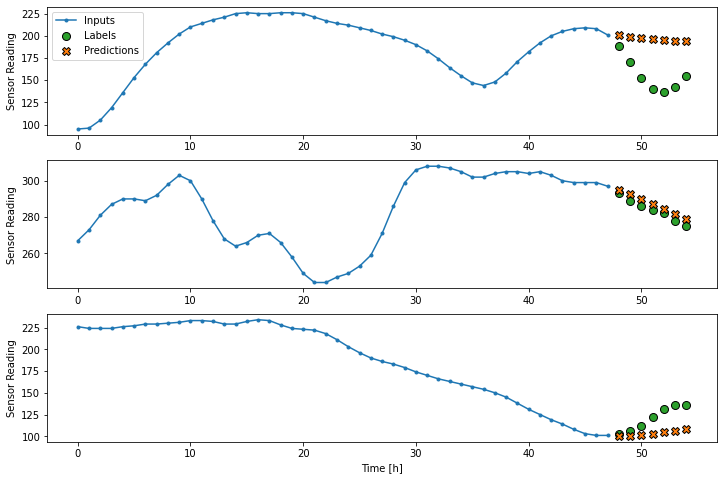

In [58]:
plot(multi_linear_model)

In [59]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
])

history = compile_and_fit(multi_dense_model, X_train, y_train)

Epoch 1/40
4610/4610 [==============================] - 21s 5ms/step - loss: 1607.5515 - mean_absolute_error: 22.9689 - my_metric_fn: 2115.2278 - val_loss: 413.4893 - val_mean_absolute_error: 12.6330 - val_my_metric_fn: 897.4294
Epoch 2/40
4610/4610 [==============================] - 20s 4ms/step - loss: 404.3452 - mean_absolute_error: 12.3534 - my_metric_fn: 885.4970 - val_loss: 411.6193 - val_mean_absolute_error: 12.8310 - val_my_metric_fn: 889.2846
Epoch 3/40
4610/4610 [==============================] - 20s 4ms/step - loss: 397.9862 - mean_absolute_error: 12.1489 - my_metric_fn: 874.5849 - val_loss: 404.3778 - val_mean_absolute_error: 12.2177 - val_my_metric_fn: 877.5179
Epoch 4/40
4610/4610 [==============================] - 20s 4ms/step - loss: 395.3290 - mean_absolute_error: 12.0665 - my_metric_fn: 869.6882 - val_loss: 392.8311 - val_mean_absolute_error: 11.9205 - val_my_metric_fn: 863.7107
Epoch 5/40
4610/4610 [==============================] - 20s 4ms/step - loss: 394.0126 - me

In [60]:
IPython.display.clear_output()
multi_performance['Dense'] = multi_dense_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

1281/1281 [==============================] - 4s 3ms/step - loss: 410.0877 - mean_absolute_error: 12.4108 - my_metric_fn: 916.4177


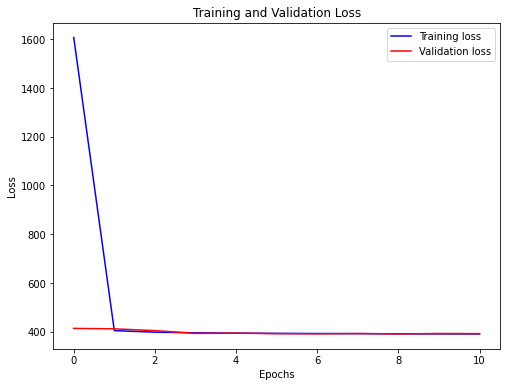

In [61]:
visualize_loss(history, "Training and Validation Loss")

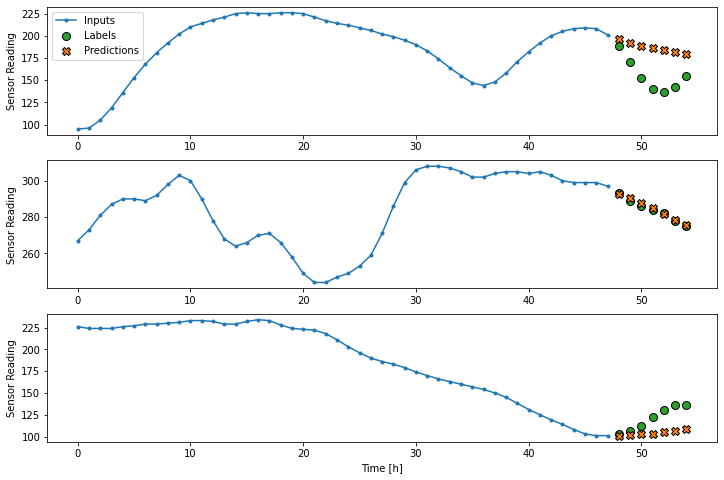

In [62]:
plot(multi_dense_model)

In [63]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((48, 1), input_shape=(48,)),                                   
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, 1])
])

history = compile_and_fit(multi_conv_model, X_train, y_train)


Epoch 1/40
4610/4610 [==============================] - 26s 5ms/step - loss: 2361.6943 - mean_absolute_error: 26.5405 - my_metric_fn: 2838.5698 - val_loss: 414.2028 - val_mean_absolute_error: 12.6115 - val_my_metric_fn: 900.9111
Epoch 2/40
4610/4610 [==============================] - 27s 6ms/step - loss: 407.0414 - mean_absolute_error: 12.4262 - my_metric_fn: 894.1439 - val_loss: 400.9245 - val_mean_absolute_error: 12.1284 - val_my_metric_fn: 883.5683
Epoch 3/40
4610/4610 [==============================] - 24s 5ms/step - loss: 397.1051 - mean_absolute_error: 12.0793 - my_metric_fn: 880.0674 - val_loss: 396.3439 - val_mean_absolute_error: 12.0471 - val_my_metric_fn: 875.4729
Epoch 4/40
4610/4610 [==============================] - 24s 5ms/step - loss: 394.5369 - mean_absolute_error: 11.9838 - my_metric_fn: 874.6573 - val_loss: 396.1009 - val_mean_absolute_error: 11.8731 - val_my_metric_fn: 873.2468
Epoch 5/40
4610/4610 [==============================] - 25s 5ms/step - loss: 393.4646 - me

In [64]:
IPython.display.clear_output()

multi_performance['Conv'] = multi_conv_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

1281/1281 [==============================] - 5s 4ms/step - loss: 410.6895 - mean_absolute_error: 12.3327 - my_metric_fn: 919.8811


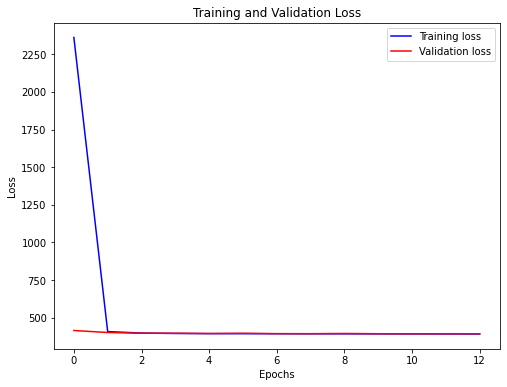

In [65]:
visualize_loss(history, "Training and Validation Loss")

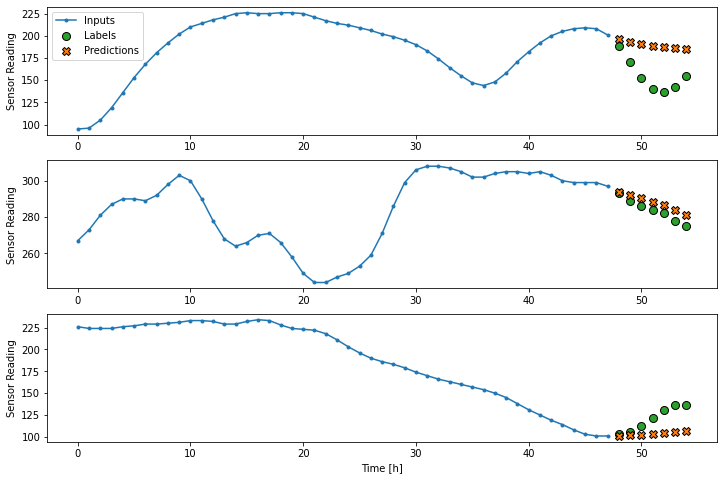

In [66]:
plot(multi_conv_model)

In [67]:
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((48, 1), input_shape=(48,)),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, 1])
])

history = compile_and_fit(multi_lstm_model, X_train, y_train)


Epoch 1/40
4610/4610 [==============================] - 74s 16ms/step - loss: 9802.9150 - mean_absolute_error: 72.5672 - my_metric_fn: 9964.0957 - val_loss: 1984.6300 - val_mean_absolute_error: 27.9170 - val_my_metric_fn: 2360.3767
Epoch 2/40
4610/4610 [==============================] - 71s 15ms/step - loss: 881.1634 - mean_absolute_error: 18.0599 - my_metric_fn: 1337.5327 - val_loss: 464.7242 - val_mean_absolute_error: 13.6969 - val_my_metric_fn: 943.9263
Epoch 3/40
4610/4610 [==============================] - 71s 15ms/step - loss: 401.6801 - mean_absolute_error: 12.5002 - my_metric_fn: 874.9465 - val_loss: 375.9507 - val_mean_absolute_error: 12.0837 - val_my_metric_fn: 837.5024
Epoch 4/40
4610/4610 [==============================] - 70s 15ms/step - loss: 365.4086 - mean_absolute_error: 11.6695 - my_metric_fn: 824.6063 - val_loss: 360.3761 - val_mean_absolute_error: 11.6255 - val_my_metric_fn: 812.3679
Epoch 5/40
4610/4610 [==============================] - 70s 15ms/step - loss: 354.6

In [68]:
IPython.display.clear_output()

multi_performance['LSTM'] = multi_lstm_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

1281/1281 [==============================] - 9s 7ms/step - loss: 346.1917 - mean_absolute_error: 11.1375 - my_metric_fn: 816.5729


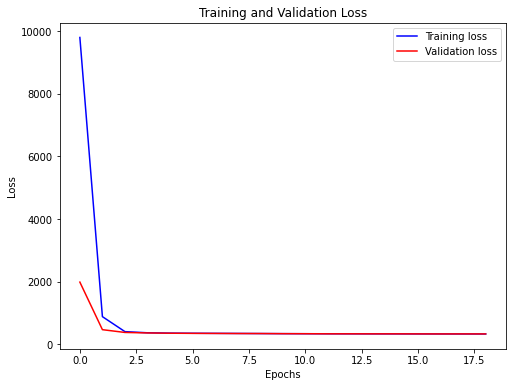

In [69]:
visualize_loss(history, "Training and Validation Loss")

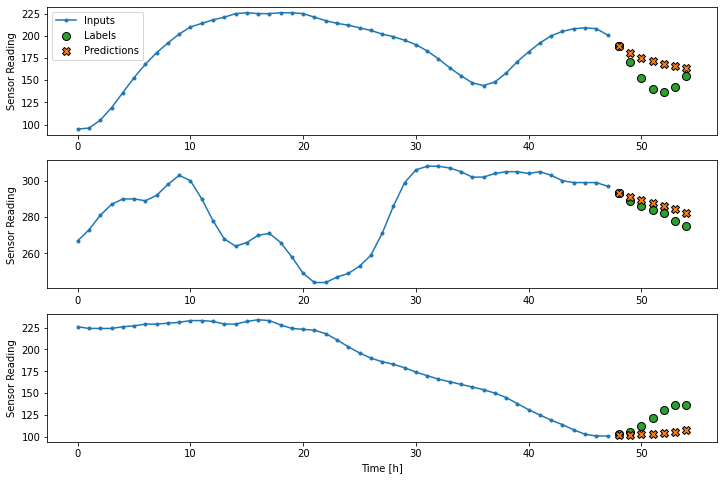

In [70]:
plot(multi_lstm_model)

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(1)

In [ ]:
feedback_model = FeedBack(units=64, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  x, *state = self.lstm_rnn(inputs)

  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

In [ ]:
def call(self, inputs, training=None):
  predictions = []
  transformed_inputs = tf.expand_dims(inputs, axis=-1)
  prediction, state = self.warmup(transformed_inputs)

  predictions.append(prediction)

  for n in range(1, self.out_steps):
    x = prediction
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    prediction = self.dense(x)
    predictions.append(prediction)

  predictions = tf.stack(predictions)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

In [ ]:
history = compile_and_fit(feedback_model, X_train, y_train)

Epoch 1/40
4630/4630 [==============================] - 559s 120ms/step - loss: 9335.0713 - mean_absolute_error: 69.7229 - my_metric_fn: 9512.9492 - val_loss: 1927.0742 - val_mean_absolute_error: 27.7771 - val_my_metric_fn: 2258.8821
Epoch 2/40
4630/4630 [==============================] - 549s 118ms/step - loss: 2199.5779 - mean_absolute_error: 29.4748 - my_metric_fn: 1703.5294 - val_loss: 2373.2844 - val_mean_absolute_error: 36.2679 - val_my_metric_fn: 1632.0022
Epoch 3/40
4630/4630 [==============================] - 540s 117ms/step - loss: 787.8198 - mean_absolute_error: 18.9142 - my_metric_fn: 1081.3306 - val_loss: 410.2829 - val_mean_absolute_error: 12.9777 - val_my_metric_fn: 852.3762
Epoch 4/40
4630/4630 [==============================] - 547s 118ms/step - loss: 381.4917 - mean_absolute_error: 12.3463 - my_metric_fn: 829.7614 - val_loss: 375.2317 - val_mean_absolute_error: 12.1203 - val_my_metric_fn: 826.7657
Epoch 5/40
4630/4630 [==============================] - 545s 118ms/step

In [ ]:
IPython.display.clear_output()

multi_performance['AR LSTM'] = feedback_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

1256/1256 [==============================] - 18s 14ms/step - loss: 353.2818 - mean_absolute_error: 11.4398 - my_metric_fn: 806.1940


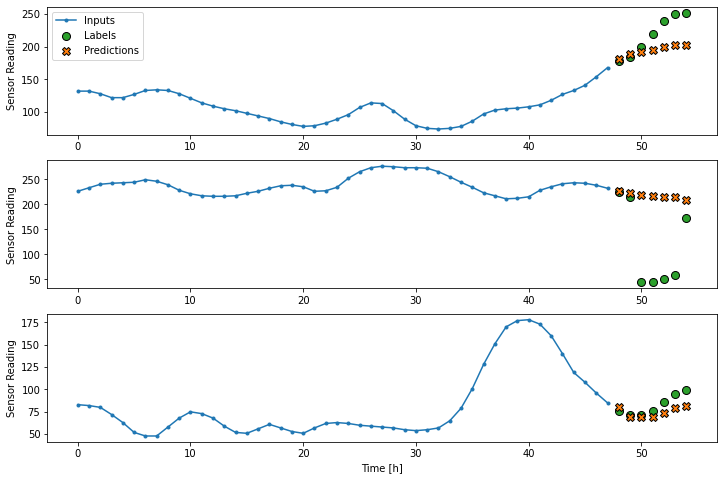

In [ ]:
plot(feedback_model)

In [ ]:
CONV_WIDTH = 3
multi_layer_conv_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((48, 1), input_shape=(48,)),  

    #
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    #
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    #
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    #
    tf.keras.layers.GlobalAveragePooling1D(),

    tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, 1])
])

history = compile_and_fit(multi_layer_conv_model, X_train, y_train)

Epoch 1/40
4630/4630 [==============================] - 87s 13ms/step - loss: 4257.9834 - mean_absolute_error: 38.3942 - my_metric_fn: 4677.6172 - val_loss: 424.3931 - val_mean_absolute_error: 13.5887 - val_my_metric_fn: 871.3885
Epoch 2/40
4630/4630 [==============================] - 59s 13ms/step - loss: 414.5928 - mean_absolute_error: 13.5213 - my_metric_fn: 857.7043 - val_loss: 486.2480 - val_mean_absolute_error: 15.9934 - val_my_metric_fn: 935.3744
Epoch 3/40
4630/4630 [==============================] - 59s 13ms/step - loss: 379.1713 - mean_absolute_error: 12.6142 - my_metric_fn: 822.7966 - val_loss: 370.0151 - val_mean_absolute_error: 12.3432 - val_my_metric_fn: 811.9458
Epoch 4/40
4630/4630 [==============================] - 59s 13ms/step - loss: 363.0811 - mean_absolute_error: 12.0926 - my_metric_fn: 804.8535 - val_loss: 350.2371 - val_mean_absolute_error: 11.5404 - val_my_metric_fn: 793.0204
Epoch 5/40
4630/4630 [==============================] - 59s 13ms/step - loss: 355.6957

In [ ]:
IPython.display.clear_output()

multi_performance['ML-CNN'] = multi_layer_conv_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

1256/1256 [==============================] - 7s 6ms/step - loss: 376.4406 - mean_absolute_error: 12.3202 - my_metric_fn: 841.4811


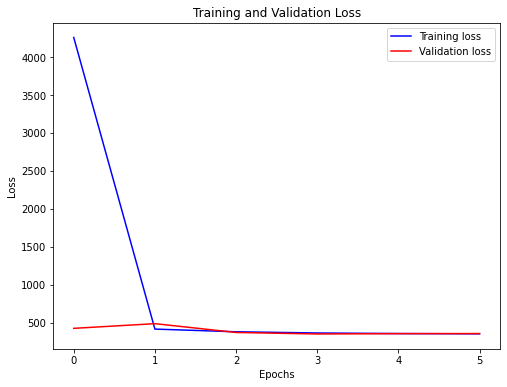

In [ ]:
visualize_loss(history, "Training and Validation Loss")

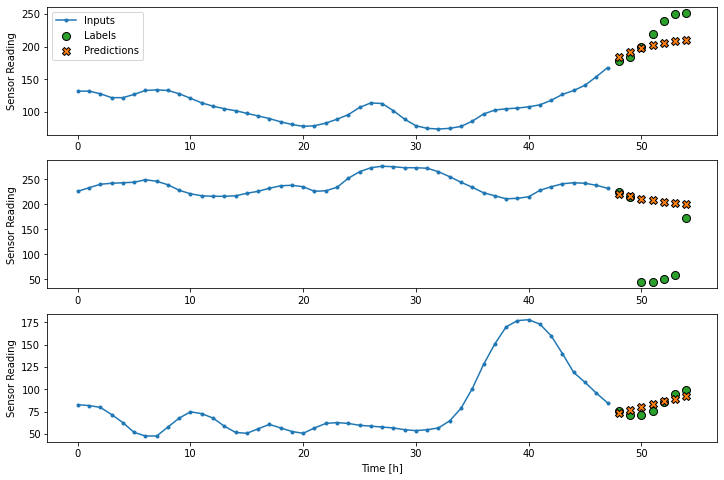

In [ ]:
plot(multi_layer_conv_model)

# **Transformer Architecture**

This is the implementation based on the transformer architecture from [Attention is all you need](https://arxiv.org/abs/1706.03762).

In [18]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res


In [19]:
def build_model(
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = tf.keras.Input(shape=(48,))
    x = tf.keras.layers.Reshape((48, 1), input_shape=(48,))(inputs)
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros())(x)
    return tf.keras.Model(inputs, outputs)

In [20]:
transformer_model = build_model(
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

history = compile_and_fit(transformer_model, X_train, y_train)

Epoch 1/40
4610/4610 [==============================] - 897s 188ms/step - loss: 1665.9775 - mean_absolute_error: 26.4644 - my_metric_fn: 2210.4126 - val_loss: 553.1617 - val_mean_absolute_error: 15.1766 - val_my_metric_fn: 1096.9696
Epoch 2/40
4610/4610 [==============================] - 866s 188ms/step - loss: 749.5121 - mean_absolute_error: 19.4321 - my_metric_fn: 1273.6910 - val_loss: 474.5514 - val_mean_absolute_error: 13.7942 - val_my_metric_fn: 991.8787
Epoch 3/40
4610/4610 [==============================] - 867s 188ms/step - loss: 704.3839 - mean_absolute_error: 18.7865 - my_metric_fn: 1212.4727 - val_loss: 446.9704 - val_mean_absolute_error: 13.2017 - val_my_metric_fn: 956.0736
Epoch 4/40
4610/4610 [==============================] - 866s 188ms/step - loss: 685.0057 - mean_absolute_error: 18.4807 - my_metric_fn: 1185.1971 - val_loss: 441.8456 - val_mean_absolute_error: 13.4825 - val_my_metric_fn: 943.0652
Epoch 5/40
4610/4610 [==============================] - 867s 188ms/step - 

KeyboardInterrupt: ignored

In [21]:
IPython.display.clear_output()

#multi_val_performance['LSTM'] = transformer_model.evaluate(multi_window.val)
multi_performance['Transformer'] = transformer_model.evaluate(X_test, y_test, batch_size=256, verbose=1)
#multi_window.plot(transformer_model)

1281/1281 [==============================] - 91s 71ms/step - loss: 430.6354 - mean_absolute_error: 12.6888 - my_metric_fn: 958.5780


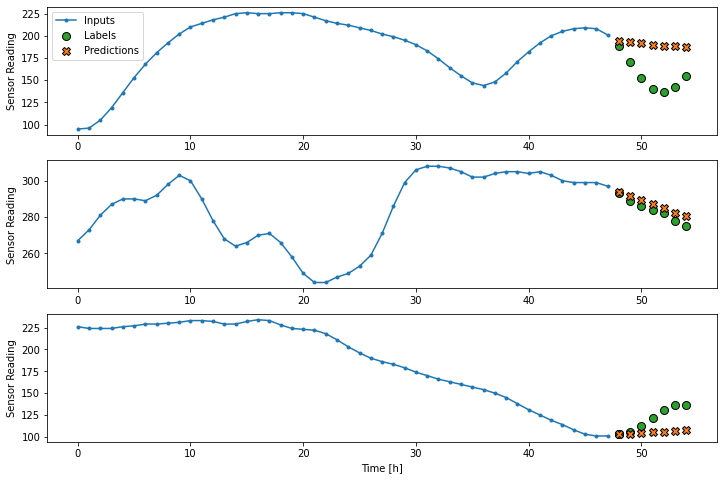

In [23]:
plot(transformer_model)

# **Using Encode-Decoder Architecture**

The intuition to use Encoder-decoder architecture for time series forcasting was similar to the use of seqence-to-sequence model for tasks like machine translation. Where the encoder can essentionally memorise or learn an abstract resprentation of the input sequence and decoder being capable of using this representation to generate the output sequence.

In this scenario, the encoder can memorise the past data and decoder can use this abstraction to predict future data.

In [31]:
# returns train, inference_encoder and inference_decoder models
def define_models(n_input, n_output, n_units):
	# define training encoder
	encoder_inputs = tf.keras.layers.Input(shape=(None, n_input))
	encoder = tf.keras.layers.LSTM(n_units, return_state=True)
	encoder_outputs, state_h, state_c = encoder(encoder_inputs)
	encoder_states = [state_h, state_c]
	# define training decoder
	decoder_inputs = tf.keras.layers.Input(shape=(None, n_output))
	decoder_lstm = tf.keras.layers.LSTM(n_units, return_sequences=True, return_state=True)
	decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
	decoder_dense = tf.keras.layers.Dense(n_output, kernel_initializer=tf.initializers.zeros())
	decoder_outputs = decoder_dense(decoder_outputs)
	model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
	# define inference encoder
	encoder_model = tf.keras.Model(encoder_inputs, encoder_states)
	# define inference decoder
	decoder_state_input_h = tf.keras.layers.Input(shape=(n_units,))
	decoder_state_input_c = tf.keras.layers.Input(shape=(n_units,))
	decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
	decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
	decoder_states = [state_h, state_c]
	decoder_outputs = decoder_dense(decoder_outputs)
	decoder_model = tf.keras.Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
	# return all models
	return model, encoder_model, decoder_model

In [32]:

# configure problem
n_features = 1
n_steps_in = 48
n_steps_out = 7
# define model
model, infenc, infdec = define_models(n_features, n_features, 128)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(), my_metric_fn])

arr = y_train.iloc[:,:-1].to_numpy()
y_shift = np.concatenate((np.zeros((arr.shape[0],1), dtype=int), arr), axis=1)

history = model.fit([X_train, y_shift], y_train, epochs=20,
                      batch_size=512, verbose=1, validation_split=0.2,
                      callbacks=[early_stopping])

Epoch 1/20
2305/2305 [==============================] - 75s 31ms/step - loss: 10106.8232 - mean_absolute_error: 75.9101 - my_metric_fn: 10189.2402 - val_loss: 2793.9905 - val_mean_absolute_error: 29.4179 - val_my_metric_fn: 2833.3992
Epoch 2/20
2305/2305 [==============================] - 69s 30ms/step - loss: 957.1910 - mean_absolute_error: 13.0859 - my_metric_fn: 980.8641 - val_loss: 253.5477 - val_mean_absolute_error: 5.8759 - val_my_metric_fn: 267.7699
Epoch 3/20
2305/2305 [==============================] - 68s 30ms/step - loss: 121.6184 - mean_absolute_error: 4.0703 - my_metric_fn: 130.2146 - val_loss: 54.4591 - val_mean_absolute_error: 2.9757 - val_my_metric_fn: 59.4768
Epoch 4/20
2305/2305 [==============================] - 70s 30ms/step - loss: 37.8012 - mean_absolute_error: 2.6419 - my_metric_fn: 40.5081 - val_loss: 28.5927 - val_mean_absolute_error: 2.4212 - val_my_metric_fn: 30.0927
Epoch 5/20
2305/2305 [==============================] - 70s 30ms/step - loss: 26.5307 - mean_

In [39]:
# encode
state = infenc.predict(X_test)

In [40]:
# start of sequence input
target_seq = np.zeros((X_test.shape[0], 1, 1))
# collect predictions
output = list()
for t in range(7):
  # predict next char
  yhat, h, c = infdec.predict([target_seq] + state, batch_size=512)
  # store prediction
  output.append(yhat)
  # update state
  state = [h, c]
  # update target sequence
  target_seq = yhat
y_pred = np.concatenate(output, axis=1)

In [49]:
x = np.squeeze(y_pred, axis=-1)

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, x)

In [51]:
mse

354.00159476136747

In [52]:
mse_last = mean_squared_error(y_test.to_numpy()[:,-1], x[:,-1])

mse_last

844.8767278122144

Text(0.5, 0, 'Time [h]')

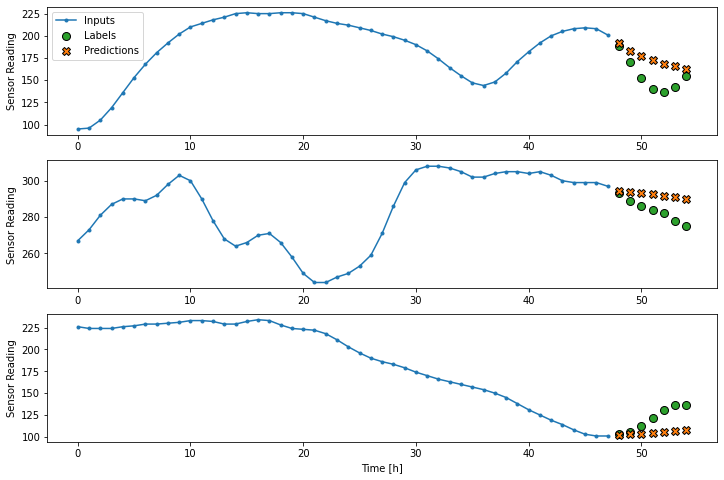

In [54]:
inputs = X_test
inputs_to_display = scaling.inverse_transform(X_test)
labels = y_test
#print(y_test)
plt.figure(figsize=(12, 8))
max_n = min(3, len(inputs))
total_window_size = 55
label_width = 7
input_slice = slice(0, 48)
input_indices = np.arange(total_window_size)[input_slice]

labels_slice = slice(48, None)
label_indices = np.arange(total_window_size)[labels_slice]
x=100
for n in range(max_n):
  plt.subplot(max_n, 1, n+1)
  plt.ylabel('Sensor Reading')
  #print(inputs_to_display[n, :])
  plt.plot(input_indices, inputs_to_display[n+x, :],
            label='Inputs', marker='.', zorder=-10)

  #print(n)
  #print(y_test.iloc[n, :])
  plt.scatter(label_indices, labels.iloc[n+x, :].tolist(),
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
  
  plt.scatter(label_indices, y_pred[n+x, :],
              marker='X', edgecolors='k', label='Predictions',
              c='#ff7f0e', s=64)

  if n == 0:
    plt.legend()

  x=x+100

plt.xlabel('Time [h]')